<h1 align="center">Machine Learning and Vision Lab</h1>
<h4 align="center">Dr. Mohammadzadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Amir Hossein Yari - 99102507</h4>
<h4 align="center">Lab 6 - Methods of Harris, LOG and SIFT for Feature Extraction</h4>

In [1]:
# Import required package
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

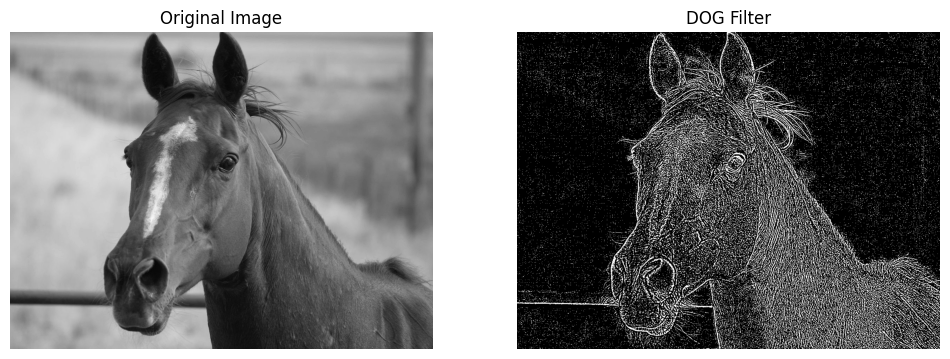

In [6]:
img = cv2.imread('img3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur1 = cv2.GaussianBlur(gray, (3, 3), 0)
blur2 = cv2.GaussianBlur(gray, (5, 5), 0)
dog = blur1 - blur2

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1),
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(dog, cmap='gray')
plt.title('DOG Filter')
plt.axis("off")
plt.show()


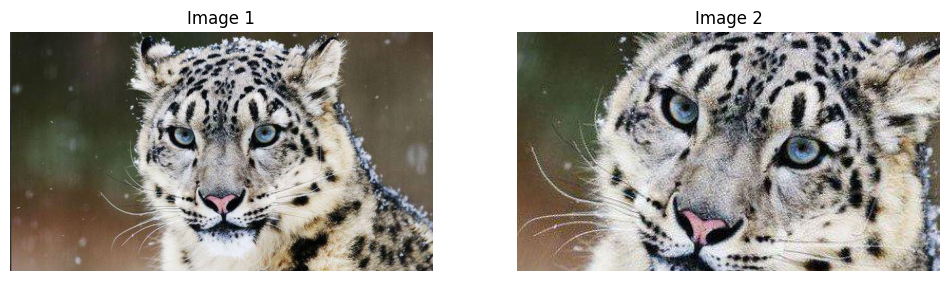

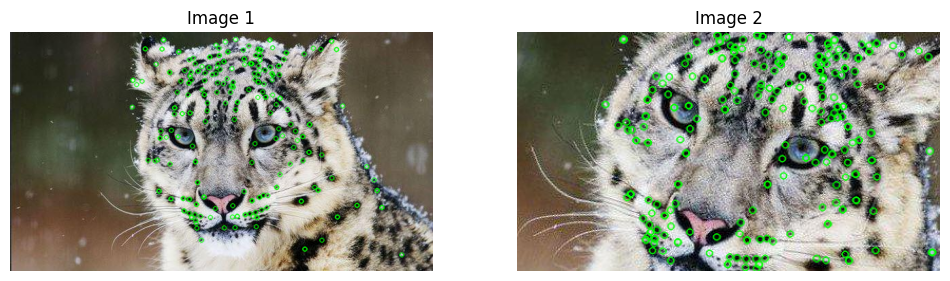

In [8]:
# Read images
img1 = plt.imread("img1.jpg").astype('float64')
img2 = plt.imread("img2.jpg").astype('float64')

# Plot original images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, img, title in zip(axes, [img1, img2], ['Image 1', 'Image 2']):
    ax.imshow(img.astype('int32'), cmap='gray')
    ax.set_title(title)
    ax.axis("off")
plt.show()

# SIFT feature extraction
sift = cv2.SIFT_create(nfeatures=250)
keypoints1, descriptors1 = sift.detectAndCompute(img1.astype(np.uint8), None)
keypoints2, descriptors2 = sift.detectAndCompute(img2.astype(np.uint8), None)

# Draw keypoints on images
img_key1 = cv2.drawKeypoints(img1.astype(np.uint8), keypoints1, None, [0, 255, 0])
img_key2 = cv2.drawKeypoints(img2.astype(np.uint8), keypoints2, None, [0, 255, 0])

# Plot images with keypoints
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, img_key, title in zip(axes, [img_key1, img_key2], ['Image 1', 'Image 2']):
    ax.imshow(img_key)
    ax.set_title(title)
    ax.axis("off")
plt.show()


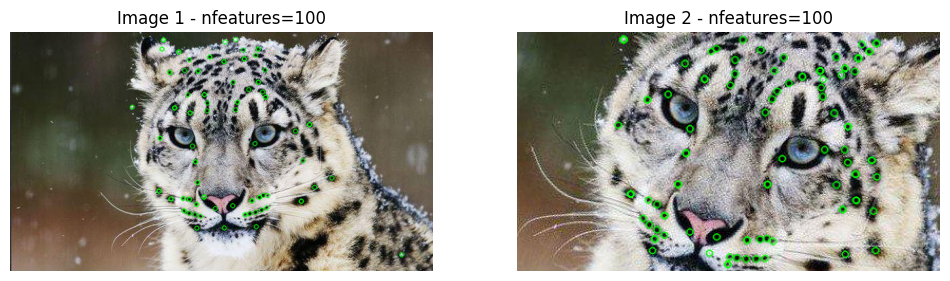

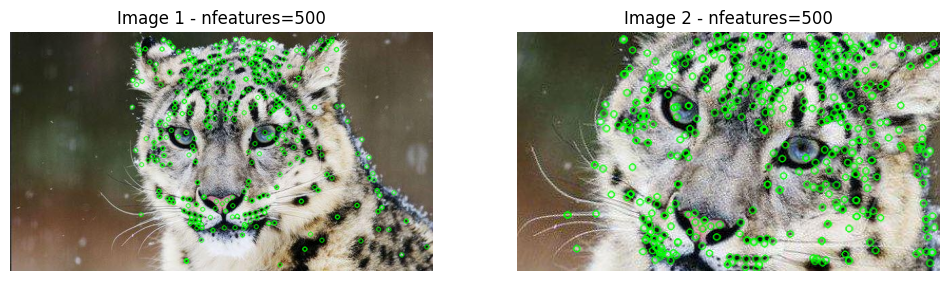

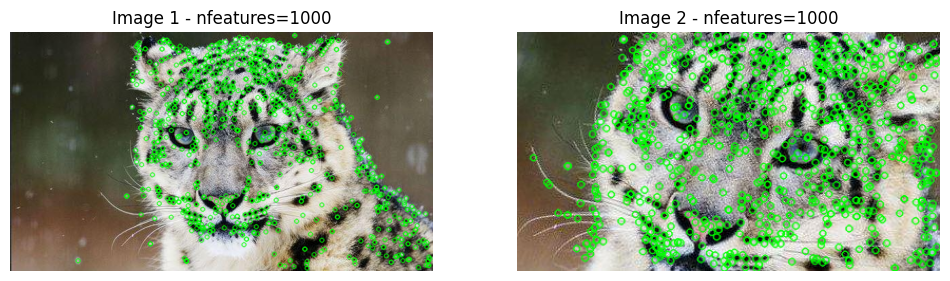

In [9]:
# Try different values for nfeatures
nfeatures_values = [100, 500, 1000]

for nfeatures in nfeatures_values:
    sift = cv2.SIFT_create(nfeatures=nfeatures)
    keypoints1, descriptors1 = sift.detectAndCompute(img1.astype(np.uint8), None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2.astype(np.uint8), None)

    img_key1 = cv2.drawKeypoints(img1.astype(np.uint8), keypoints1, None, [0, 255, 0])
    img_key2 = cv2.drawKeypoints(img2.astype(np.uint8), keypoints2, None, [0, 255, 0])

    # Plot images with keypoints
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for ax, img_key, title in zip(axes, [img_key1, img_key2], ['Image 1', 'Image 2']):
        ax.imshow(img_key)
        ax.set_title(f'{title} - nfeatures={nfeatures}')
        ax.axis("off")
    plt.show()


<span style="color: green;">

### SIFT Keypoint Extraction Parameters

The parameters used for keypoint extraction in the SIFT algorithm are set when creating the `cv2.SIFT_create()` object. In the provided code, the main parameter used is:

- **nfeatures**: The maximum number of features (keypoints) to retain. If not specified, all detected features are retained. In the code, it's set to 100, 500, 1000 that indicating that the algorithm will attempt to find and retain up to 100, 500, 1000 keypoints.



</span>

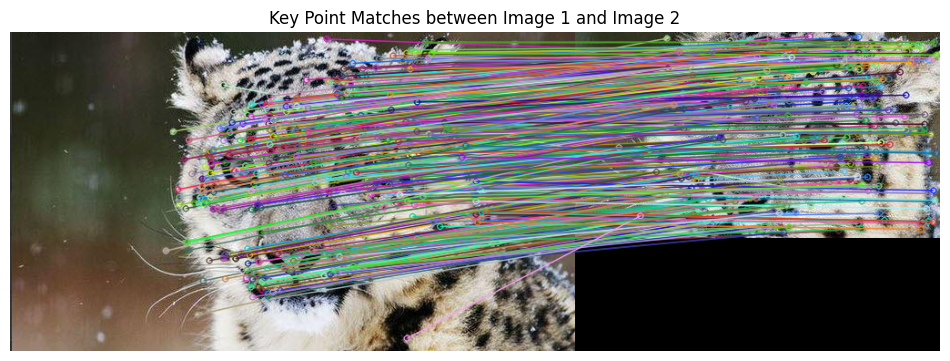

In [11]:
# Use BFMatcher to find best matches
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to find good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1.astype(np.uint8), keypoints1, img2.astype(np.uint8), keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot the matches
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.title('Key Point Matches between Image 1 and Image 2')
plt.axis('off')
plt.show()

<span style="color: green;">

### Analysis of Keypoint Matching Result

#### Visualization of Matches
- The code utilizes the `cv2.drawMatches` function to visually represent the matched keypoints between `img1.jpg` and `img2.jpg`.
- Each line in the output image corresponds to a matching pair of keypoints, and the line length indicates the distance between the matched keypoints.

#### Filtering with Ratio Test
- A ratio test (`m.distance < 0.75 * n.distance`) is applied to filter out potentially good matches.
- The threshold value of 0.75 is commonly used but can be adjusted based on the specific characteristics of the images.

#### Observations
- Matches passing the ratio test are considered good matches and are displayed in the output image.
- Keypoint matches establish correspondences between distinctive features in `img1.jpg` and their closest counterparts in `img2.jpg`.
- Strong, distinct lines in the output image indicate reliable matches.

#### Interpretation
- The output provides insights into the correspondences between key features in the two images.
- Too many matches may include outliers or noise, while too few matches might require parameter adjustments.
- The effectiveness of keypoint matching depends on the content and characteristics of the images.


</span>

f:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


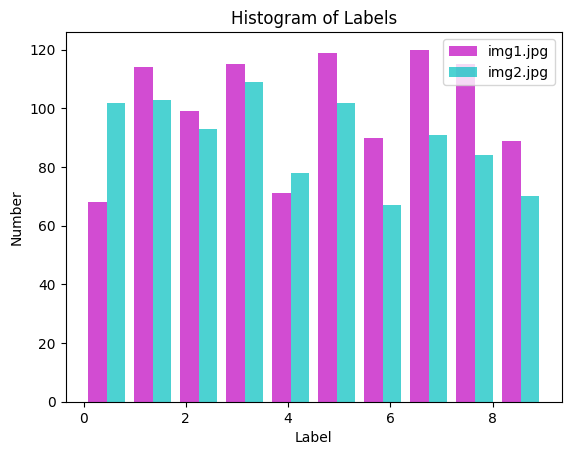

f:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


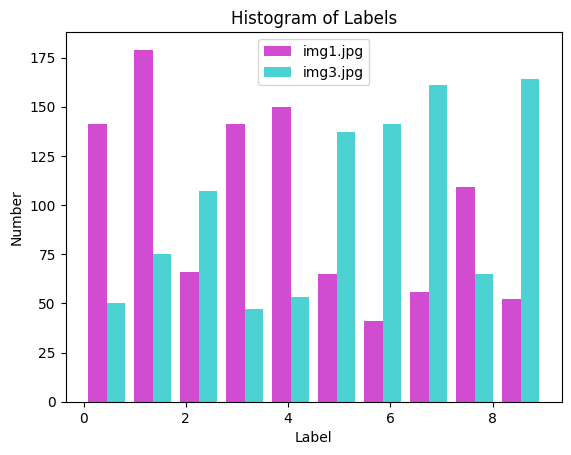

f:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


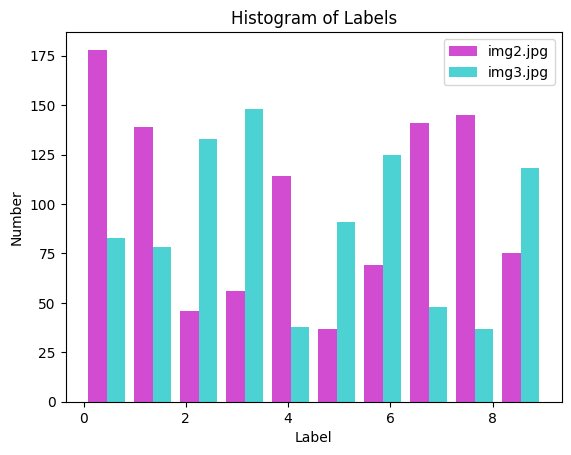

In [14]:
def compute_and_plot_histogram(image_paths, num_keypoints=1000, num_clusters=10):
    all_descriptors = []

    for image_path in image_paths:
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        keypoints = sorted(keypoints, key=lambda x: -x.response)[:num_keypoints]
        all_descriptors.append(sift.compute(gray, keypoints)[1])

    all_descriptors = np.vstack(all_descriptors)

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(all_descriptors)

    # Plot histogram
    plt.hist([kmeans.labels_[:num_keypoints], kmeans.labels_[num_keypoints:]], bins=num_clusters, color=['m', 'c'], alpha=0.7, label=image_paths)
    plt.title('Histogram of Labels')
    plt.xlabel('Label')
    plt.ylabel('Number')
    plt.legend()
    plt.show()

# Example usage
compute_and_plot_histogram(['img1.jpg', 'img2.jpg'])
compute_and_plot_histogram(['img1.jpg', 'img3.jpg'])
compute_and_plot_histogram(['img2.jpg', 'img3.jpg'])


<span style="color: green;">

### Observations:
- The histograms visually represent the distribution of keypoints across clusters for each image in the given pairs.
- Similar distributions suggest that the images share common visual patterns, while different distributions may indicate distinct visual content.

So image 1 and image 2 more similar.

</span>

<span style="color: green;">

### Bag-of-Visual-Words (BoVW) Approach

1. **Descriptor Extraction:**
   - Compute SIFT descriptors for key points in all training images.
   - Collect these descriptors to build a pool of visual words.

2. **Clustering (K-Means):**
   - Apply K-Means clustering to group the visual descriptors into a predefined number of clusters (visual words).
   - Each cluster center becomes a visual word.

3. **Histogram Representation:**
   - For each training image, represent it as a histogram of visual words.
   - Count how many descriptors fall into each cluster and use these counts as feature values.

4. **Training a Classifier:**
   - Use the histograms of visual words as feature vectors.
   - Label the training images based on the known classes ('Image 1' and 'Image 2').
   - Train a classifier (e.g., SVM, Random Forest) on the labeled feature vectors.

### Testing Phase

1. **Descriptor Extraction for Test Images:**
   - For a test image (not seen during training), compute SIFT descriptors.

2. **Histogram Representation:**
   - Build a histogram of visual words for the test image using the cluster centers obtained during training.

3. **Classification:**
   - Feed the histogram into the trained classifier.
   - Obtain the predicted class label for the test image.

4. **Result Interpretation:**
   - If the predicted label corresponds to 'Image 1' or 'Image 2,' the classifier has successfully categorized the test image.

</span>